# Библиотека Pandas

Библиотека `pandas` активно используется в современном data science для работы с данными, которые могут быть представлены в виде таблиц (а это очень, очень большая часть данных)

`pandas` есть в пакете Anaconda, но если вдруг у Вас её по каким-то причинам нет, то можно установить, раскомментировав одну из следующих команд:

In [1]:
# !pip3 install pandas
# !conda install pandas

In [2]:
import numpy as np
import pandas as pd # Стандартное сокращение для pandas. Всегда используйте его!

# pd.Series

Тип данных pd.Series представляет собой одномерный набор данных. Отсутствующий данные записываются как `np.nan` (в этот день термометр сломался или метеоролог был пьян); они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

### Создание
Создадим Series из списка температур

In [3]:
some_list = [1, 3, 5.7, np.nan, 6, 8]
ser_1 = pd.Series(some_list)
ser_1

0    1.0
1    3.0
2    5.7
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
# Так же можно в явном виде указать индексы, чтобы потом было более удобно обращаться к элементам
ind = ['1st day', '2nd day', '3rd day', '4th day', '5rd day', '6th day']

ser_2 = pd.Series(some_list, index=ind)
ser_2

1st day    1.0
2nd day    3.0
3rd day    5.7
4th day    NaN
5rd day    6.0
6th day    8.0
dtype: float64

In [5]:
ser_2['4th day']

nan

In [13]:
ser_2.at["0"]

KeyError: '0'

In [6]:
some_list[3]

nan

In [7]:
ser_1[3]

nan

In [7]:
other_ser = pd.Series(some_list, np.arange(1,7))
other_ser[3]

5.7

In [8]:
# А еще можно дать pd.Series имя, чтобы было совсем красиво
ser_3 = pd.Series(some_list, index=ind, name='Temperature')
ser_3

1st day    1.0
2nd day    3.0
3rd day    5.7
4th day    NaN
5rd day    6.0
6th day    8.0
Name: Temperature, dtype: float64

### Индексирование
С индексами можно работать так же, как и в случае с обычным list.

In [9]:
print(ser_3[0])

print('-----------')

print(ser_3[1:3])

print('-----------')

print(ser_3[::-1])

1.0
-----------
2nd day    3.0
3rd day    5.7
Name: Temperature, dtype: float64
-----------
6th day    8.0
5rd day    6.0
4th day    NaN
3rd day    5.7
2nd day    3.0
1st day    1.0
Name: Temperature, dtype: float64


In [12]:
print(other_ser[1])

print('-----------')

print(other_ser[1:3])

print('-----------')

print(other_ser[::-1])

1.0
-----------
2    3.0
3    5.7
dtype: float64
-----------
6    8.0
5    6.0
4    NaN
3    5.7
2    3.0
1    1.0
dtype: float64


### Индексирование pd.Series по условиям

In [13]:
date_range = pd.date_range('20190101', periods=10)
ser_4 = pd.Series(np.random.rand(10), index=date_range)
ser_4

2019-01-01    0.960336
2019-01-02    0.344484
2019-01-03    0.319343
2019-01-04    0.322336
2019-01-05    0.859184
2019-01-06    0.309695
2019-01-07    0.080606
2019-01-08    0.936352
2019-01-09    0.753280
2019-01-10    0.109974
Freq: D, dtype: float64

In [14]:
ser_4 > 0.5

2019-01-01     True
2019-01-02    False
2019-01-03    False
2019-01-04    False
2019-01-05     True
2019-01-06    False
2019-01-07    False
2019-01-08     True
2019-01-09     True
2019-01-10    False
Freq: D, dtype: bool

В качестве индекса можно указать выражение, и нам будут возвращены только те элементы, для которых значение является `True`

In [15]:
ser_4[ser_4 > 0.5]

2019-01-01    0.960336
2019-01-05    0.859184
2019-01-08    0.936352
2019-01-09    0.753280
dtype: float64

In [18]:
ser_4[(ser_4 > 0.6) | (ser_4 < 0.2)]

2019-01-01    0.960336
2019-01-05    0.859184
2019-01-07    0.080606
2019-01-08    0.936352
2019-01-09    0.753280
2019-01-10    0.109974
dtype: float64

In [19]:
ser_4[(ser_4 > 0.6) & (ser_4 < 0.2)]

Series([], Freq: D, dtype: float64)

### Сортировки
Тип `pd.Series` можно отсортировать как по значениям, так и по индексу.

In [20]:
ser_4.sort_index()

2019-01-01    0.960336
2019-01-02    0.344484
2019-01-03    0.319343
2019-01-04    0.322336
2019-01-05    0.859184
2019-01-06    0.309695
2019-01-07    0.080606
2019-01-08    0.936352
2019-01-09    0.753280
2019-01-10    0.109974
Freq: D, dtype: float64

In [23]:
ser_4 = ser_4.sort_values(ascending=False)

In [24]:
ser_4

2019-01-01    0.960336
2019-01-08    0.936352
2019-01-05    0.859184
2019-01-09    0.753280
2019-01-02    0.344484
2019-01-04    0.322336
2019-01-03    0.319343
2019-01-06    0.309695
2019-01-10    0.109974
2019-01-07    0.080606
dtype: float64

### Операции с series
Тип `pd.Series` можно модифицировать проще, чем стандартный ``list`` из Python.

In [25]:
ser_4 + 100

2019-01-01    100.960336
2019-01-08    100.936352
2019-01-05    100.859184
2019-01-09    100.753280
2019-01-02    100.344484
2019-01-04    100.322336
2019-01-03    100.319343
2019-01-06    100.309695
2019-01-10    100.109974
2019-01-07    100.080606
dtype: float64

In [26]:
np.exp(ser_4)

2019-01-01    2.612574
2019-01-08    2.550661
2019-01-05    2.361234
2019-01-09    2.123955
2019-01-02    1.411262
2019-01-04    1.380349
2019-01-03    1.376223
2019-01-06    1.363010
2019-01-10    1.116250
2019-01-07    1.083944
dtype: float64

In [27]:
term_1 = pd.Series(np.random.randint(0, 10, 5))
term_2 = pd.Series(np.random.randint(0, 10, 6))

term_1 + term_2

0     1.0
1     2.0
2    13.0
3     8.0
4     7.0
5     NaN
dtype: float64

In [31]:
type(term_1.shape), type(len(term_1))

(tuple, int)

# pd.DataFrame

Тип данных pd.DataFrame представляет собой двумерную таблицу с данными. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.
### Создание и основные объекты

In [32]:
# Dataframe можно составить из словаря. Ключ будет соответсовать колонке
some_dict = {'one': pd.Series([1,2,3], index=['a','b','c']),
             'two': pd.Series([1,2,3,4], index=['a','b','c','d']),
             'three': pd.Series([5,6,7,8], index=['a','b','c','d'])}
df = pd.DataFrame(some_dict)
df

,one,two,three
a,1.0,1,5
b,2.0,2,6
c,3.0,3,7
d,NaN,4,8


In [33]:
# Dataframe можно составить из словаря. Ключ будет соответсовать колонке
some_dict = {'one': pd.Series([1,2,3]),
             'two': pd.Series([1,2,3,4]),
             'three': pd.Series([5,6,7,8])}
df = pd.DataFrame(some_dict)
df

,one,two,three
0,1.0,1,5
1,2.0,2,6
2,3.0,3,7
3,NaN,4,8


In [34]:
#Альтернативно, из списка списков с аргументом columns

some_array = [[1,1,5], [2,2,6], [3,3,7], [np.nan, 4,8]]
df = pd.DataFrame(some_array, index=['a', 'b', 'c', 'd'], columns=['one', 'two', 'three'])
df

,one,two,three
a,1.0,1,5
b,2.0,2,6
c,3.0,3,7
d,NaN,4,8


In [35]:
df.values

array([[ 1.,  1.,  5.],
       [ 2.,  2.,  6.],
       [ 3.,  3.,  7.],
       [nan,  4.,  8.]])

In [37]:
list(df.columns)

['one', 'two', 'three']

In [38]:
df.columns = ['first_column', 'second_column', 'third_column']
df.index = [1,2,3,4]
df

,first_column,second_column,third_column
1,1.0,1,5
2,2.0,2,6
3,3.0,3,7
4,NaN,4,8


### Индексирование 
Есть очень много способов индексировать DataFrame в Pandas. Не все из них хорошие! Вот несколько удобных, но не универсальных.

#### По колонкам
Индексирование по колонке возращает pd.Series. Можно выбирать не одну колонку, а сразу несколько. Тогда снова вернётся pd.DataFrame.

In [44]:
first_column = df['first_column']
first_column

1    1.0
2    2.0
3    3.0
4    NaN
Name: first_column, dtype: float64

In [40]:
df.first_column

1    1.0
2    2.0
3    3.0
4    NaN
Name: first_column, dtype: float64

In [41]:
subset_dataframe = df[['first_column', 'second_column']]
subset_dataframe

,first_column,second_column
1,1.0,1
2,2.0,2
3,3.0,3
4,NaN,4


In [43]:
one_column_dataframe = df[['first_column']]
one_column_dataframe

,first_column
1,1.0
2,2.0
3,3.0
4,NaN


#### По строкам
Можно писать любые слайсы, как в Python-списке. Они будут применяться к строкам. Нельзя обращаться по элементу!

In [45]:
df[1] # не сработает

KeyError: 1

In [46]:
df[:1]

,first_column,second_column,third_column
1,1.0,1,5


In [47]:
df[1:4]

,first_column,second_column,third_column
2,2.0,2,6
3,3.0,3,7
4,NaN,4,8


#### Универсальное индексирование: .loc и .iloc

.loc и .iloc --- это два взаимозаменяемых атрибута, которые позволяют индексировать по обеим осям сразу. Путаницы не возникает из-за фиксированного порядка перечисления осей.

In [48]:
# По индексам: 
df.iloc[1:3, :2]

,first_column,second_column
2,2.0,2
3,3.0,3


In [49]:
df.loc[1:3, ['first_column', 'second_column']]

,first_column,second_column
1,1.0,1
2,2.0,2
3,3.0,3


In [ ]:
#По строчкам:

df.iloc

#По строчкам и по столбцам:

df.iloc #или отдельно

df[['first_column', 'second_column']]

Лучше использовать по умолчанию либо только loc, либо только .iloc! А лучше вообще всегда только .iloc, чтобы не запутаться.

### Модификации датасета, создание новых колонок
Можно просто брать и создавать новую колонку. Синтаксис тут вполне естественный.

In [50]:
new_column = [5,2,1,4]
df['new_column'] = new_column
df

,first_column,second_column,third_column,new_column
1,1.0,1,5,5
2,2.0,2,6,2
3,3.0,3,7,1
4,NaN,4,8,4


Аналогично, можно применять к отдельным колонкам арифметические операции (ведь колонки --- это Series!)

In [51]:
df['first_column'] = df['first_column'] * 10
df

,first_column,second_column,third_column,new_column
1,10.0,1,5,5
2,20.0,2,6,2
3,30.0,3,7,1
4,NaN,4,8,4


## Реальный датасет
Мы будем работать с датасетом ``Титаник``. Файлы необходимо скачать локально или загрузить с помощью функции ниже.
![alt text](https://drive.google.com/uc?id=1Tb52nFFsjI8sqv0AlMpx25aNJ62xzp5w)

Информация о файлах: 
 - *titanic_data.csv* содержит различную информацию о пассажирах Титаника (билет, класс, возраст и т.п.)
 - *titanic_surv.csv* содержит для каждого пассажира из первого файла информацию о том, выжил ли этот пассажир (метка 1) или нет (метка 0)


### Чтение из файла
Обычно данные хранятся в виде таблиц в файлах формата .csv или .xlsx. На этом семинаре мы будем загружать данные из .csv файлов.


 
Загрузим первый файл

In [52]:
# df_1 = pd.read_csv('titanic_data.csv')
pass_link = 'https://www.dropbox.com/s/lyzcuxu1pdrw5qb/titanic_data.csv?dl=1'
titanic_passengers = pd.read_csv(pass_link, index_col='PassengerId') # index_col=?

In [53]:
print('Всего пассажиров: ', len(titanic_passengers))
titanic_passengers.head(10)

Всего пассажиров:  891


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### Разная информация о датасете

Можно узнать размер таблицы, информацию о значениях таблицы, различные статистики по значениям.

In [54]:
titanic_passengers.shape

(891, 10)

In [55]:
titanic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [56]:
titanic_passengers.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## Задание 1 
Опишите данный датасет: какое расределение женщин/мужчин в нем? Сколько пассажиров ехало в каждом классе? Какой средний/минимальный/максимальный возраст пассажиров?

In [58]:
titanic_passengers['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [59]:
titanic_passengers['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [60]:
max(titanic_passengers['Age']), titanic_passengers['Age'].max()

(80.0, 80.0)

In [62]:
# среднее
titanic_passengers['Age'].mean()

29.69911764705882

## Задание 2
Сгруппируйте записи по классам пассажиров, в каждой группе посчитайте средний возраст. Используйте метод ``pandas.DataFrame.groupby``.

In [ ]:
#YOUR CODE

#Google it!


## Слияние таблиц
Таблицы можно сливать несколькими способами. Мы рассмотрим слияние по индексу: метод называется ``pd.join``.

In [63]:
# df_2 = pd.read_csv('titanic_surv.csv')
surv_link = 'https://www.dropbox.com/s/v35x9i6a1tc7emm/titanic_surv.csv?dl=1'
df_2 = pd.read_csv(surv_link)

In [64]:
df_2.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [65]:
titanic_passengers

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


## Задание 3
Слейте два датасета по колонке индекса. Используйте ``pd.join``.

In [66]:
df_2.index = np.arange(1, 892)

In [67]:
df_2 = df_2.sample(frac=1)
df_2.head()

,Survived
201,0
849,0
675,0
745,1
635,0


In [68]:
titanic_passengers = titanic_passengers.join(df_2)
titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Задание 4
Сколько всего выживших пассажиров? Выживших пассажиров по каждому из полов? Постройте матрицу корреляций факта выживания, пола и возраста.

In [69]:
titanic_passengers['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [70]:
titanic_passengers['Survived'].sum()

342

In [72]:
len(titanic_passengers[titanic_passengers['Survived'] == 1])

342

In [74]:
males = titanic_passengers[titanic_passengers['Sex'] == 'male']
females = titanic_passengers[titanic_passengers['Sex'] == 'female']

(len(males[males['Survived'] == 1]), 
 len(females[females['Survived'] == 1]))

(109, 233)

In [75]:
corr_data = titanic_passengers[['Survived', 'Sex', 'Age']]
corr_data['Sex'] = (titanic_passengers['Sex'] == 'male').astype(int)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
corr_data.head()

,Survived,Sex,Age
PassengerId,,,
1,0,1,22.0
2,1,0,38.0
3,1,0,26.0
4,1,0,35.0
5,0,1,35.0


In [77]:
corr_data.corr()

,Survived,Sex,Age
Survived,1.000000,-0.543351,-0.077221
Sex,-0.543351,1.000000,0.093254
Age,-0.077221,0.093254,1.000000


In [78]:
import seaborn as sns

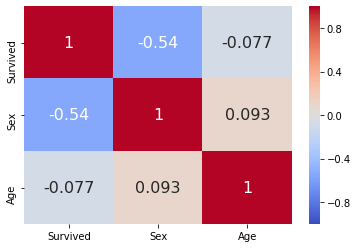

In [79]:
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, annot_kws={"size": 16})